In [1]:
import networkx as nx #For Cnstructing and working on Graphs
from collections import OrderedDict #For Sorting the Dictionaries
import matplotlib.pyplot as plt #For Graph Visualization
import operator #For Itemgetter() Function as we useto get value from a dictionary key
from networkx import common_neighbors
import pandas as pd #For Data Manipulation
import numpy as np #For Data Manipulation
import time #For tracking runtime

In [2]:
data = open('p2p-Gnutella08.txt').readlines()  #Reading the data from the file
G = nx.DiGraph() #Creating a directed graph 
for row in data:  
    nodeStrip = row.split() #Splitting the data
    G.add_edges_from([(nodeStrip[0], nodeStrip[1])]) #Adding the edges to the graph
G = G.to_undirected() #Converting the directed graph to undirected graph
G = nx.convert_node_labels_to_integers(G)   #Converting the node labels to integers
print(len(G.nodes()))

6301


In [3]:
arr = np.random.randint(0, 6301, size=[100])
arr

array([2585, 2025, 2041, 6156, 3443, 4545, 1854,  388,  354, 4063, 3670,
        471, 4350,  281, 5064, 4571, 1065, 6077, 4664, 5366, 2449, 4891,
       5083, 5589,  972, 2302,  913, 3266, 3025, 3471,  627, 3321,  775,
       2515, 1597, 2144, 4767, 2981, 1777, 2996, 1383, 1021, 3581,  642,
       3488, 4185,  903, 2688,   17, 4110, 2723, 3534, 2294, 6001, 1923,
       2329, 5948, 2332, 5188, 3661, 4766, 4768, 4562, 4768, 5859,   32,
       4506, 2927, 3283, 5152, 4876, 3609, 5585, 5787, 6144, 3593, 5630,
       4711, 2969, 3840,  400, 1721, 1356,  261, 6175, 2753, 4480, 5062,
       1136, 3828, 1326, 4390, 4551, 2504,  310, 2354, 6154, 1133, 2616,
       2727])

In [4]:
# Algorithm 1 truss decomposition:-
def truss_decomposition_nx(G):  #Function to get the truss decomposition using networkx
    print("Algorithm 1 has started") #Printing the message that the algorithm has started
    i = 2
    G1 = None
    trns_dict = dict() #Creating a dictionary to store the trussness of the edges
    while len(G.edges()) > 0:  #Looping until the graph has edges
        G = nx.k_truss(G, i) #Getting the k-truss of the graph
        if i>2: #If the k-truss is greater than 2
            edges = set(list(G1.edges())) - set(list(G.edges())) #Getting the edges that are not in the k-truss
            edges = list(edges) #Converting the edges to list
            trns_dict[i-1] = edges #Adding the edges to the dictionary
        G1 = G.copy() #Copying the graph
        i += 1 #Incrementing the k-truss index
    print("Algorithm 1 is executed") #Printing the message that the algorithm has executed
    return trns_dict #Returning the trussness dictionary
trussness_dict_algo1 = truss_decomposition_nx(G) #Getting the trussness dictionary using the first algorithm
algo1 = open("Algo1_Output.txt", "w") #Creating a file to store the output of the first algorithm
algo1.write(str(trussness_dict_algo1)) #Writing the trussness dictionary to the file
algo1.close() #Closing the file

Algorithm 1 has started
Algorithm 1 is executed


In [5]:
def get_key(val): #Function to get the key from the value
    found = False #Initializing the found variable to false
    for key, value in trussness_dict_algo1.items(): #Looping through the trussness dictionary
        if val in value: #If the value is found in the dictionary
            found = True  #Setting the found variable to true
            return int(key) #Returning the key
    if found == False: #If the value is not found in the dictionary
        return 0

In [6]:
#Algorithm 2 query processing using truss decomposition:-    
def query_processing_using_k_truss(G,k,q): #Function to get the communities using the k-truss
    # print("Algorithm 2 has started") #Printing the message that the algorithm has started
    if k == 0 or k == 1: #If the k-truss is 0 or 1
        return 0
    elif k == 2: #If the k-truss is 2
        return G.edges() #Returning the edges of the graph
    visited = [] #Creating a list to store the visited edges
    k_truss_index = 0   #Initializing the k-truss index to 0
    n_q=list(G.neighbors(q))    #Getting the neighbors of the query node
    Communities = []  #List to store the nodes of the community
    for u in n_q: #Looping through the neighbors of the query node
        if (get_key((q,u))>=k or get_key((u,q))>=k) and (q,u) not in visited: #If the nodes are k-truss connected
            k_truss_index+=1 #Incrementing the k-truss index
            C1=()
            Q=[]
            Q.append((q,u)) #Appending the nodes to the queue
            visited.append((q,u)) #Appending the nodes to the visited list
            while Q != []:
                (x,y)=Q.pop() #Popping the nodes from the queue
                C1=tuple(set(C1 + (x,y))) #Adding the nodes to the community
                n_x=list(G.neighbors(x)) #Getting the neighbors of the node
                n_y=list(G.neighbors(y)) #Getting the neighbors of the node
                for z in (list(set(n_x) & set(n_y))): #Looping through the neighbors of the nodes
                    if (get_key((x,z))>=k or get_key((z,x))>=k) and (get_key((y,z))>=k or get_key((z,y))>=k) : #If the nodes are k-truss connected
                        if (x,z) not in visited and (z,x) not in visited: #If the nodes are not visited
                            Q.append((x,z)) #Appending the nodes to the queue
                            visited.append((x,z)) #Appending the nodes to the visited list
                        if (y,z) not in visited and (z,y) not in visited: #If the nodes are not visited
                            Q.append((y,z)) #Appending the nodes to the queue
                            visited.append((y,z)) #Appending the nodes to the visited list
            Communities.append(C1) #Appending the community to the list
    # print("Algorithm 2 is executed") #Printing the message that the algorithm has executed
    return Communities  #Returning the communities

algo2_runtime = []

communities_algo2 = []
start = time.time()
for i in arr:
    communities_algo2 = query_processing_using_k_truss(G,2,i) #Getting the communities using the second algorithm
end = time.time()
algo2 = open("Algo2_Output_k_2.txt", "w") #Creating a file to store the output of the second algorithm
algo2.write(str(communities_algo2)) #Writing the communities to the file
algo2.close() #Closing the file
runTime = (end-start) / 100
algo2_runtime.append(runTime)
print("The average time of execution for k=2 :", runTime, "s")

communities_algo2 = []
start = time.time()
for i in arr:
    communities_algo2 = query_processing_using_k_truss(G,3,i) #Getting the communities using the second algorithm
end = time.time()
algo2 = open("Algo2_Output_k_3.txt", "w") #Creating a file to store the output of the second algorithm
algo2.write(str(communities_algo2)) #Writing the communities to the file
algo2.close() #Closing the file
runTime = (end-start) / 100
algo2_runtime.append(runTime)
print("The average time of execution for k=3 :", runTime, "s")

communities_algo2 = []
start = time.time()
for i in arr:
    communities_algo2 = query_processing_using_k_truss(G,4,i) #Getting the communities using the second algorithm
end = time.time()
algo2 = open("Algo2_Output_k_4.txt", "w") #Creating a file to store the output of the second algorithm
algo2.write(str(communities_algo2)) #Writing the communities to the file
algo2.close() #Closing the file
runTime = (end-start) / 100
algo2_runtime.append(runTime)
print("The average time of execution for k=4 :", runTime, "s")

communities_algo2 = []
start = time.time()
for i in arr:
    communities_algo2 = query_processing_using_k_truss(G,5,i) #Getting the communities using the second algorithm
end = time.time()
algo2 = open("Algo2_Output_k_5.txt", "w") #Creating a file to store the output of the second algorithm
algo2.write(str(communities_algo2)) #Writing the communities to the file
algo2.close() #Closing the file
runTime = (end-start) / 100
algo2_runtime.append(runTime)
print("The average time of execution for k=5 :", runTime, "s")

print(algo2_runtime)

The average time of execution for k=2 : 1.4400482177734375e-06 s
The average time of execution for k=3 : 1.0849417114257813 s
The average time of execution for k=4 : 0.3145414686203003 s
The average time of execution for k=5 : 0.023295941352844237 s
[1.4400482177734375e-06, 1.0849417114257813, 0.3145414686203003, 0.023295941352844237]


In [7]:
#Algorithm 3 TCP_Index:-
def TCP_Index(G): #Function to get the TCP Index of the graph
    print("Algorithm 3 has started") #Printing the message that the algorithm has started
    weight={} #Creating a dictionary to store the weights of the edges
    T={} #Creating a dictionary to store the TCP_index of the nodes
    S={} #Creating a dictionary to store the support of the edges
    for x in G.nodes(): #Looping through the nodes of the graph
        n_x=list(G.neighbors(x))  #Getting the neighbors of the node
        Gx=nx.Graph() #Creating a graph
        Gx.add_edges_from(G.edges(G.neighbors(x))) #Adding the edges to the graph
        for edge in Gx.edges(): #Looping through the edges of the graph
            y=edge[0] #Getting the first node of the edge
            z=edge[1] #Getting the second node of the edge
            temp=[get_key((x,y)),get_key((x,z)),get_key((y,z))] #Getting the trussness of the nodes
            weight[(y,z)]=min(temp) #Getting the minimum trussness of the nodes
        T[x]=n_x #Adding the neighbors of the node to the TCP_index dictionary
        kmax=max(weight.values()) #Getting the maximum weight of the edges
        
        for k in range(2,kmax+1): #Looping through the k-truss
            if weight[(y,z)]==k: #If the weight of the edge is equal to the k-truss
                S[x]=(y,z) #Adding the edge to the support dictionary 
            for (y,z) in S.values(): #Looping through the support dictionary
                if y not in T[x] and z not in T[x]: #If the nodes are not in the TCP_index dictionary
                    T[(y,z)]=weight[(y,z)] #Adding the nodes to the TCP_index dictionary
    print("Algorithm 3 is executed") #Printing the message that the algorithm has executed
    return T #Returning the TCP_index dictionary
trussness_dict_algo3 = TCP_Index(G) #Getting the TCP_index dictionary using the third algorithm
algo3 = open("Algo3_Output.txt", "w") #Creating a file to store the output of the third algorithm
algo3.write(str(trussness_dict_algo3)) #Writing the TCP_index dictionary to the file
algo3.close() #Closing the file

Algorithm 3 has started
Algorithm 3 is executed


In [8]:
#Algorithm 4 query processing using TCP_Index:-
def Query_Processing_TCP(G,k,q): #Function to get the communities using the TCP_index
    # print("Algorithm 4 has started") #Printing the message that the algorithm has started
    T=trussness_dict_algo3 #Getting the TCP_index dictionary
    visited = [] #Creating a list to store the visited edges
    l=0 #Initializing the l to 0
    Communities = [] #List to store the nodes of the community
    n_q=list(G.neighbors(q)) #Getting the neighbors of the query node
    for u in n_q: #Looping through the neighbors of the query node
        if (get_key((q,u))>=k or get_key((u,q))>=k) and (q,u) not in visited: #If the nodes are k-truss connected
            l+=1 #Incrementing the l
            V={} #Creating a dictionary to store the nodes of the community
            C1=() #Creating a tuple to store the nodes of the community
            Q=[] #Creating a list to store the nodes of the community
            Q.append((q,u)) #Appending the nodes to the queue
            while Q != []: #Looping through the queue
                (x,y)=Q.pop() #Popping the nodes from the queue
                if x != q: #If the node is not the query node
                    y = x #Assigning the node to y
                    x = q #Assigning the query node to x
                if ((x,y)) not in visited: #If the nodes are not visited
                    V[tuple([x,y])]=T[x] #Adding the nodes to the dictionary
                    for V_lst in V.values(): #Looping through the dictionary
                        for z in V_lst: #Looping through the nodes of the dictionary
                            visited.append((x,z)) #Appending the nodes to the visited list
                            C1=tuple(set(C1 + (x,z))) #Adding the nodes to the community
                            if (z,x) not in visited: #If the nodes are not visited
                                Q.append((z,x)) #Appending the nodes to the queue
            Communities.append(C1) #Appending the community to the list
    # print("Algorithm 4 is executed") #Printing the message that the algorithm has executed
    return Communities #Returning the communities 
    
algo4_runtime = []

communities_algo4 = []
start = time.time()
for i in arr:
    communities_algo4 = Query_Processing_TCP(G,2,i) #Getting the communities using the fourth algorithm
end = time.time()
algo4 = open("Algo4_Output_k_2.txt", "w") #Creating a file to store the output of the fourth algorithm
algo4.write(str(communities_algo4)) #Writing the communities to the file
algo4.close() #Closing the file
runTime = (end-start) / 100
algo4_runtime.append(runTime)
print("The average time of execution for k=2 :", runTime, "s")

communities_algo4 = []
start = time.time()
for i in arr:
    communities_algo4 = Query_Processing_TCP(G,3,i) #Getting the communities using the fourth algorithm
end = time.time()
algo4 = open("Algo4_Output_k_3.txt", "w") #Creating a file to store the output of the fourth algorithm
algo4.write(str(communities_algo4)) #Writing the communities to the file
algo4.close() #Closing the file
runTime = (end-start) / 100
algo4_runtime.append(runTime)
print("The average time of execution for k=3 :", runTime, "s")

communities_algo4 = []
start = time.time()
for i in arr:
    communities_algo4 = Query_Processing_TCP(G,4,i) #Getting the communities using the fourth algorithm
end = time.time()
algo4 = open("Algo4_Output_k_4.txt", "w") #Creating a file to store the output of the fourth algorithm
algo4.write(str(communities_algo4)) #Writing the communities to the file
algo4.close() #Closing the file
runTime = (end-start) / 100
algo4_runtime.append(runTime)
print("The average time of execution for k=4 :", runTime, "s")

communities_algo4 = []
start = time.time()
for i in arr:
    communities_algo4 = Query_Processing_TCP(G,5,i) #Getting the communities using the fourth algorithm
end = time.time()
algo4 = open("Algo4_Output_k_5.txt", "w") #Creating a file to store the output of the fourth algorithm
algo4.write(str(communities_algo4)) #Writing the communities to the file
algo4.close() #Closing the file
runTime = (end-start) / 100
algo4_runtime.append(runTime)
print("The average time of execution for k=5 :", runTime, "s")

print(algo4_runtime)

The average time of execution for k=2 : 0.020675482749938964 s
The average time of execution for k=3 : 0.02264768123626709 s
The average time of execution for k=4 : 0.023553359508514404 s
The average time of execution for k=5 : 0.023920440673828126 s
[0.020675482749938964, 0.02264768123626709, 0.023553359508514404, 0.023920440673828126]


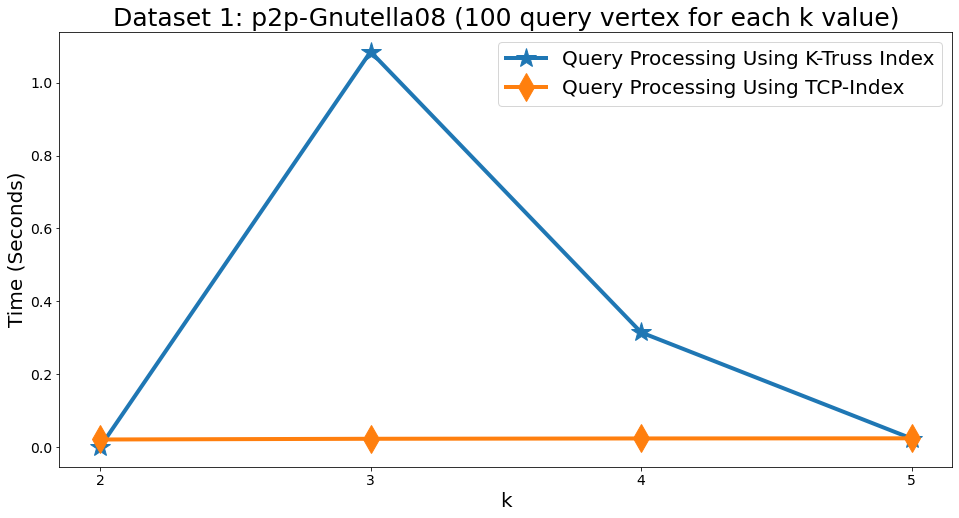

In [9]:
x = [2,3,4,5]
plt.figure(figsize=(16,8))
plt.plot(x,algo2_runtime, label='Query Processing Using K-Truss Index', linewidth=4, marker='*', markersize=20)
plt.plot(x,algo4_runtime, label='Query Processing Using TCP-Index', linewidth=4, marker='d', markersize=20)
plt.xlabel("k", fontsize=20)
plt.ylabel("Time (Seconds)", fontsize=20)
plt.legend(fontsize=20)
plt.title("Dataset 1: p2p-Gnutella08 (100 query vertex for each k value)", fontsize=25)
plt.xticks(x, [2,3,4,5], fontsize=14)
plt.yticks(fontsize=14)
plt.show()